# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv('NFL Play by Play 2009-2016 (v3).csv')

C:\Users\gabri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(5)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [4]:
df.drop(df.iloc[:, 30:102], inplace=True, axis=1)

In [5]:
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt


In [6]:
df.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick
count,3.624470e+05,362447.000000,362447.000000,308229.000000,362447.000000,362259.000000,362073.000000,361724.000000,361724.000000,362447.000000,362447.000000,361724.000000,336850.000000,362447.0,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000
mean,2.012664e+09,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649,28.413542,48.616807,7.305236,25.907895,0.049422,0.291183,1.0,5.034595,0.072171,0.029166,0.000392,0.001368
std,2.292258e+06,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486,13.002355,25.161965,4.863445,24.859579,0.216747,0.454308,0.0,9.144627,0.258770,0.168271,0.019790,0.036968
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,-87.000000,0.000000,0.000000,1.0,-74.000000,0.000000,0.000000,0.000000,0.000000
25%,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,5.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.013091e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,19.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.015091e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,43.000000,0.000000,1.000000,1.0,7.000000,0.000000,0.000000,0.000000,0.000000
max,2.017010e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,99.000000,1.000000,1.000000,1.0,99.000000,1.000000,1.000000,1.000000,1.000000


## 1 - Verique a quantidade de valores faltantes de cada atributo. Descarte as colunas que tem uma quantidade de valores faltantes maior que 10% do tamanho do conjunto de dados

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           362447 non-null  object 
 1   GameID         362447 non-null  int64  
 2   Drive          362447 non-null  int64  
 3   qtr            362447 non-null  int64  
 4   down           308229 non-null  float64
 5   time           362259 non-null  object 
 6   TimeUnder      362447 non-null  int64  
 7   TimeSecs       362259 non-null  float64
 8   PlayTimeDiff   362073 non-null  float64
 9   SideofField    361997 non-null  object 
 10  yrdln          361724 non-null  float64
 11  yrdline100     361724 non-null  float64
 12  ydstogo        362447 non-null  int64  
 13  ydsnet         362447 non-null  int64  
 14  GoalToGo       361724 non-null  float64
 15  FirstDown      336850 non-null  float64
 16  posteam        340468 non-null  object 
 17  DefensiveTeam  340468 non-nul

In [8]:
columns = []
for cols in df.columns:
    columns.append(cols)

print(columns)

['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder', 'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100', 'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam', 'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp', 'Touchdown', 'ExPointResult', 'TwoPointConv', 'DefTwoPoint', 'Safety', 'Onsidekick', 'PuntResult', 'PlayType']


In [9]:
def find_columns_nan(df):
    for i in columns:
        if df[i].isna().sum() > 36245:
            print(i)

In [10]:
find_columns_nan(df)

down
ExPointResult
TwoPointConv
DefTwoPoint
PuntResult


In [11]:
df['down'].isna().sum()

54218

In [12]:
df = df.drop('down', 1)

In [13]:
df['ExPointResult'].isna().sum()

353399

In [14]:
df = df.drop('ExPointResult', 1)

In [15]:
df['TwoPointConv'].isna().sum()

361919

In [16]:
df = df.drop('TwoPointConv', 1)

In [17]:
df['DefTwoPoint'].isna().sum()

362433

In [18]:
df = df.drop('DefTwoPoint', 1)

In [19]:
df['PuntResult'].isna().sum()

342560

In [20]:
df = df.drop('PuntResult', 1)

## 2 - Substitua os valores ausentes da coluna 'FirstDown" pelo valor mediano na coluna. Apresente um histograma com distribuição dos valores da coluna antes e depois da substituição.

In [21]:
median_value = df['FirstDown'].median()
median_value

0.0

<AxesSubplot:>

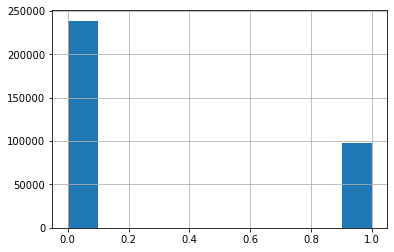

In [22]:
df['FirstDown'].hist()

In [23]:
df.loc[df['FirstDown'].isna()] = median_value

In [24]:
df['FirstDown'].isna().sum()

0

<AxesSubplot:>

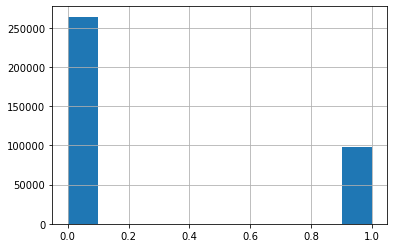

In [25]:
df['FirstDown'].hist()

## 3 - Substitua os valores ausentes na coluna "TimeSecs" pelo valor médio da coluna. Apresente um histograma com distribuição dos valores da coluna antes e depois da substituição.

In [26]:
df['TimeSecs'].describe()

count    362264.000000
mean       1569.965398
std        1111.611146
min        -900.000000
25%         536.000000
50%        1613.000000
75%        2504.000000
max        3600.000000
Name: TimeSecs, dtype: float64

<AxesSubplot:>

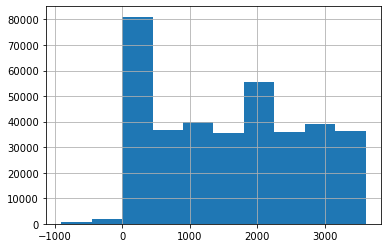

In [27]:
df['TimeSecs'].hist()

In [28]:
mean_value = df['TimeSecs'].mean()
mean_value

1569.965398162666

In [29]:
df.loc[df['TimeSecs'].isna()] = mean_value

<AxesSubplot:>

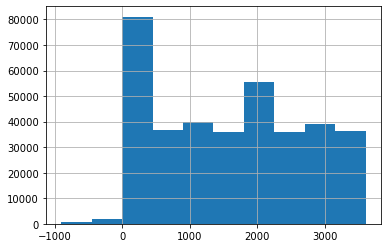

In [30]:
df['TimeSecs'].hist()

## 4 - Em vez de substituir os valores ausentes, outra abordagem comum é descartar os pontos de dados que contêm valores ausentes. Isso pode ser feito facilmente aplicando a função dropna(). Execute essa abordagem e exiba o número de linhas antes e depois desse tratamento. O ideal é que esse método seja aplicado apenas a atributos que tenham poucos valores faltantes.

In [31]:
df['GoalToGo'].isna().sum()

563

In [32]:
print("O total de linhas antes de realizar o dropna é de: {}".format(len(df)))

O total de linhas antes de realizar o dropna é de: 362447


In [33]:
df.dropna(subset = ['GoalToGo'], inplace=True)

In [34]:
df['GoalToGo'].isna().sum()

0

In [35]:
print("O total de linhas depois de realizar o dropna é de: {}".format(len(df)))

O total de linhas depois de realizar o dropna é de: 361884


## 5 - Utilizabdo a matplotlib, apressente um boxplot para identificar as colunas na tabela que contêm outliers. Observe que os valores em todas as colunas que são originalmente armazenados como 'int64', com exceção do GameID.

In [36]:
df_float_cols = df.select_dtypes(include=['float64'])

C:\Users\gabri\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\gabri\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\gabri\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\gabri\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


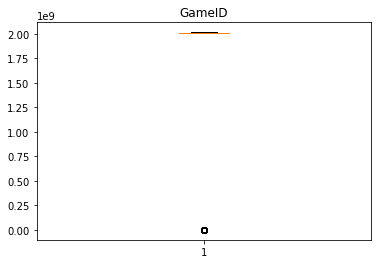

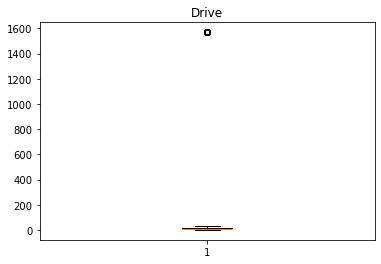

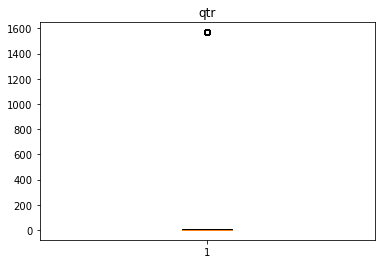

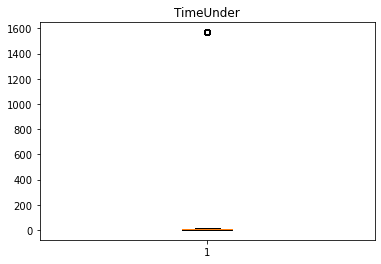

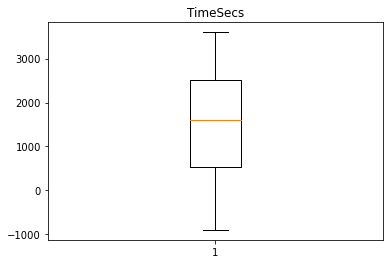

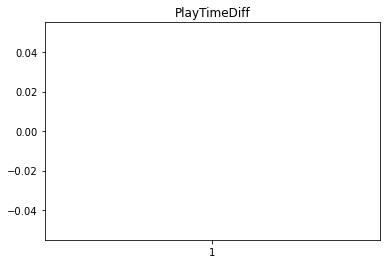

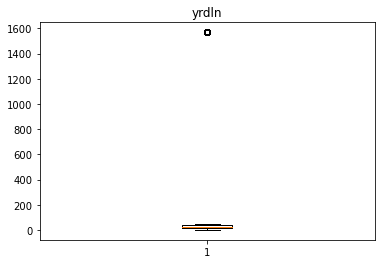

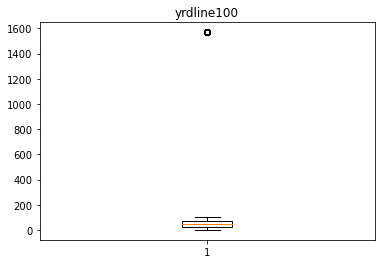

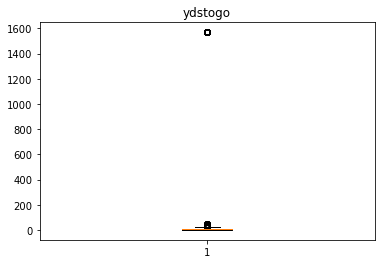

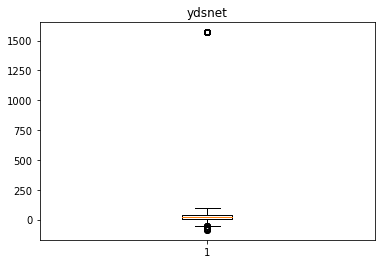

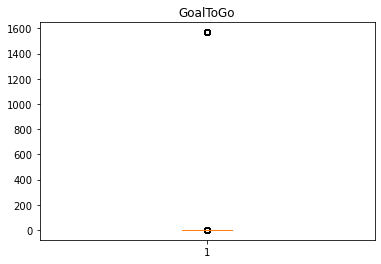

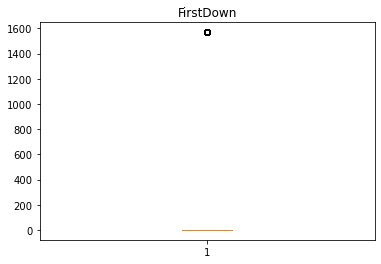

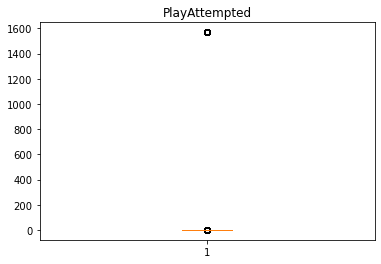

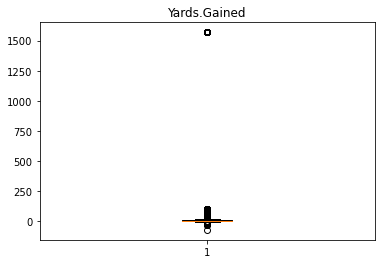

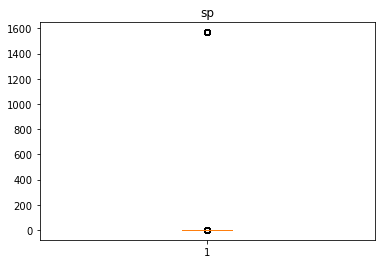

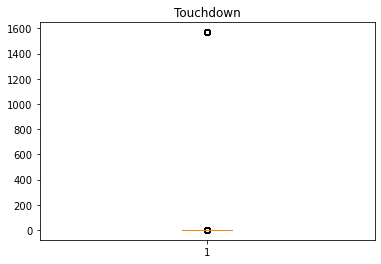

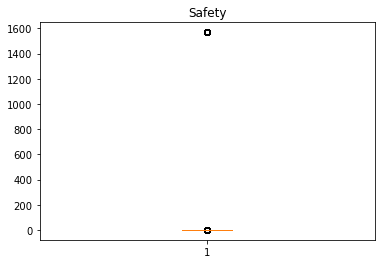

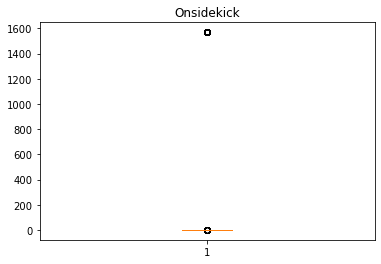

In [37]:
for cols in df_float_cols.columns:
    data = df_float_cols[cols]
    fig1, ax1 = plt.subplots()
    ax1.set_title(cols)
    ax1.boxplot(data)

## 6- Os boxplots devem sugerir ccolunas que contêm valores anormalmente altos. Para descartar os outliers, podemos calcular a pontuação Z para cada atributo e remover as instâncias que contêm atributos com pontuação Z anormalmente alta ou baixa (por exemplo, se Z > 3 ou Z <= -3).

In [55]:
df_z_score = df_float_cols.apply(stats.zscore)
df_z_score

,GameID,Drive,qtr,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick
0,-3.610700,-0.342195,-0.090538,-0.215820,-1.413405,NaN,-0.712051,-1.065541,-0.228690,-0.610616,-0.023892,-0.030175,-0.048835,-0.142062,-0.024541,-0.023321,-0.022504,-0.022496
1,0.270051,-0.314303,-0.062181,0.207090,1.819633,NaN,0.402025,0.248349,0.053277,-0.493569,-0.023892,-0.030175,-0.020486,-0.003899,-0.024541,-0.023321,-0.022504,-0.022496
2,0.270051,-0.314303,-0.062181,0.207090,1.786340,NaN,0.534654,0.135082,-0.087706,-0.563797,-0.023892,-0.030175,-0.020486,-0.224960,-0.024541,-0.023321,-0.022504,-0.022496
3,0.270051,-0.314303,-0.062181,0.178896,1.749448,NaN,0.455077,0.203042,-0.003116,-0.563797,-0.023892,-0.030175,-0.020486,-0.142062,-0.024541,-0.023321,-0.022504,-0.022496
4,0.270051,-0.314303,-0.062181,0.178896,1.742249,NaN,0.455077,0.203042,-0.003116,-0.563797,-0.023892,-0.001840,-0.020486,-0.142062,-0.024541,-0.023321,-0.022504,-0.022496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,0.285348,0.215645,0.022889,-0.187626,-1.393609,NaN,0.216346,-0.272677,0.053277,0.208714,-0.023892,-0.030175,-0.020486,0.825076,0.003791,0.005011,-0.022504,-0.022496
362443,0.285348,0.215645,0.022889,-0.187626,-1.401708,NaN,-0.314167,-0.725742,-0.228690,0.208714,-0.023892,-0.030175,-0.020486,-0.142062,0.003791,-0.023321,-0.022504,-0.022496
362444,-3.610700,-0.342195,-0.090538,-0.215820,-1.413405,NaN,-0.712051,-1.065541,-0.228690,-0.610616,-0.023892,-0.030175,-0.048835,-0.142062,-0.024541,-0.023321,-0.022504,-0.022496
362445,0.285348,0.243537,0.022889,-0.187626,-1.402608,NaN,0.508128,-0.023491,0.053277,-0.634026,-0.023892,-0.030175,-0.020486,-0.169695,-0.024541,-0.023321,-0.022504,-0.022496


## 8 - Descarte colunas com Z> 3 ou Z <= -3.

In [90]:
for col in df_z_score.columns:
    df_z_score = df_z_score.drop(df_z_score[(df_z_score[col] < 3) & (df_z_score[col] < -3)].index)

In [91]:
df_z_score

,GameID,Drive,qtr,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick
1,0.270051,-0.314303,-0.062181,0.207090,1.819633,NaN,0.402025,0.248349,0.053277,-0.493569,-0.023892,-0.030175,-0.020486,-0.003899,-0.024541,-0.023321,-0.022504,-0.022496
2,0.270051,-0.314303,-0.062181,0.207090,1.786340,NaN,0.534654,0.135082,-0.087706,-0.563797,-0.023892,-0.030175,-0.020486,-0.224960,-0.024541,-0.023321,-0.022504,-0.022496
3,0.270051,-0.314303,-0.062181,0.178896,1.749448,NaN,0.455077,0.203042,-0.003116,-0.563797,-0.023892,-0.030175,-0.020486,-0.142062,-0.024541,-0.023321,-0.022504,-0.022496
4,0.270051,-0.314303,-0.062181,0.178896,1.742249,NaN,0.455077,0.203042,-0.003116,-0.563797,-0.023892,-0.001840,-0.020486,-0.142062,-0.024541,-0.023321,-0.022504,-0.022496
5,0.270051,-0.286411,-0.062181,0.178896,1.732351,NaN,-0.659000,1.154479,0.053277,-0.610616,-0.023892,-0.030175,-0.020486,-0.142062,-0.024541,-0.023321,-0.022504,-0.022496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362441,0.285348,0.187753,0.022889,-0.187626,-1.388210,NaN,-0.261115,0.814680,0.137868,-0.680844,-0.023892,-0.001840,-0.020486,-0.142062,-0.024541,-0.023321,-0.022504,-0.022496
362442,0.285348,0.215645,0.022889,-0.187626,-1.393609,NaN,0.216346,-0.272677,0.053277,0.208714,-0.023892,-0.030175,-0.020486,0.825076,0.003791,0.005011,-0.022504,-0.022496
362443,0.285348,0.215645,0.022889,-0.187626,-1.401708,NaN,-0.314167,-0.725742,-0.228690,0.208714,-0.023892,-0.030175,-0.020486,-0.142062,0.003791,-0.023321,-0.022504,-0.022496
362445,0.285348,0.243537,0.022889,-0.187626,-1.402608,NaN,0.508128,-0.023491,0.053277,-0.634026,-0.023892,-0.030175,-0.020486,-0.169695,-0.024541,-0.023321,-0.022504,-0.022496


C:\Users\gabri\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\gabri\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\gabri\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\gabri\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


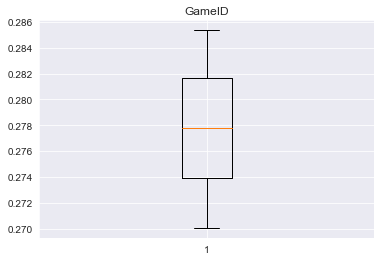

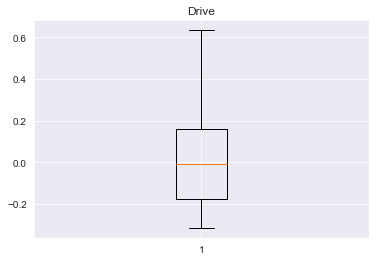

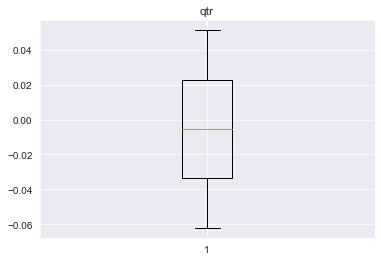

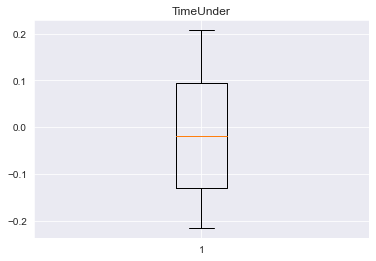

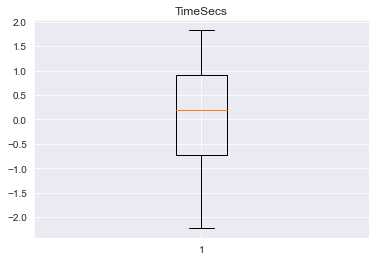

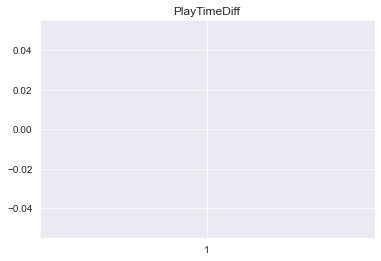

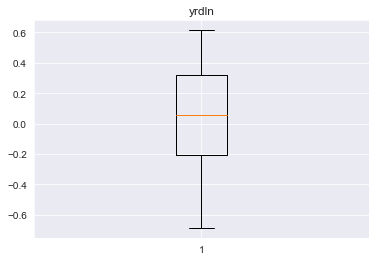

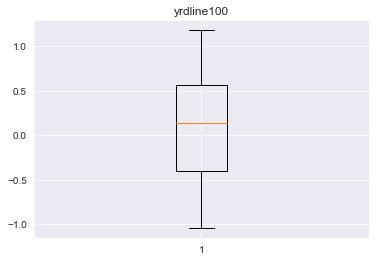

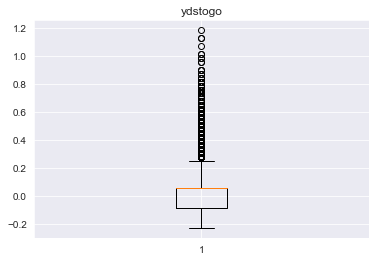

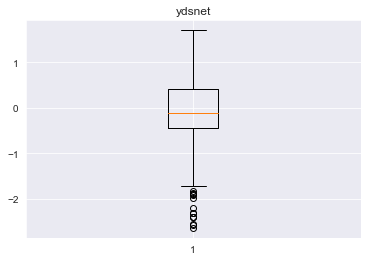

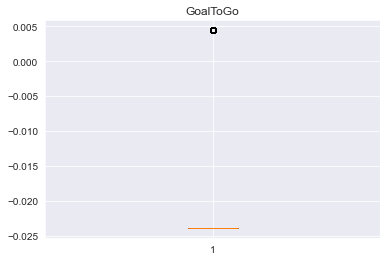

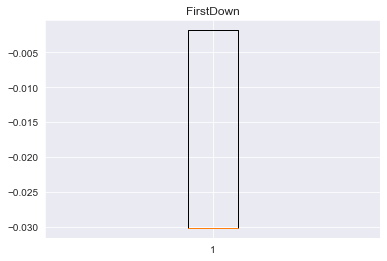

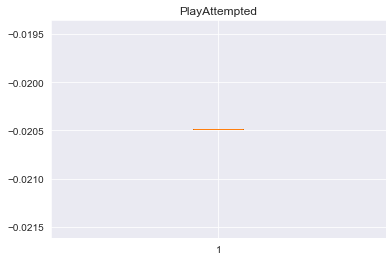

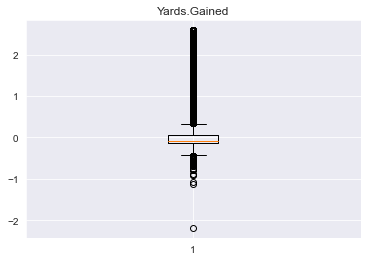

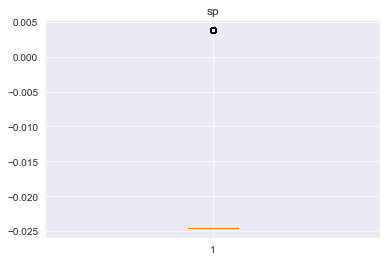

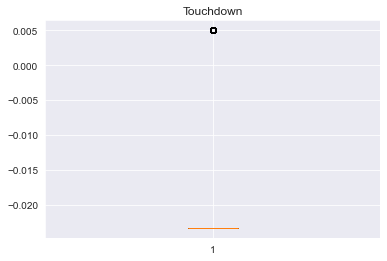

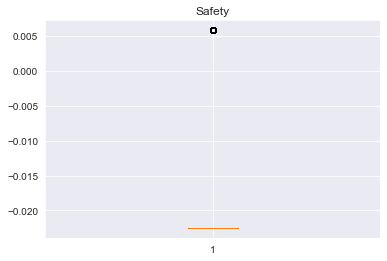

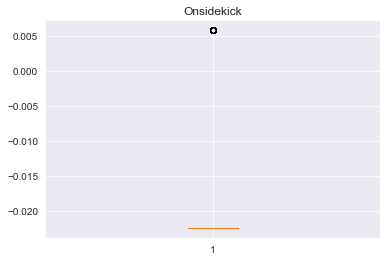

In [93]:
for cols in df_z_score.columns:
    data = df_z_score[cols]
    fig1, ax1 = plt.subplots()
    ax1.set_title(cols)
    ax1.boxplot(data)

# Parte 2

In [58]:
data = pd.read_csv('DTW_prec.csv')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    6191 non-null   object 
 1   PRCP    6191 non-null   float64
dtypes: float64(1), object(1)
memory usage: 96.9+ KB


In [60]:
data.describe()

,PRCP
count,6191.000000
mean,0.081197
std,0.230326
min,0.000000
25%,0.000000
50%,0.000000
75%,0.030000
max,4.380000


In [61]:
data.head(3)

,DATE,PRCP
0,1/1/2001,0.0
1,1/2/2001,0.0
2,1/3/2001,0.0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    6191 non-null   object 
 1   PRCP    6191 non-null   float64
dtypes: float64(1), object(1)
memory usage: 96.9+ KB


## 9 - Desenhe um gráfico de linha das séries temporais diárias.

In [63]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [64]:
data = data.set_index('DATE')

In [65]:
data.head(3)

,PRCP
DATE,
2001-01-01,0.0
2001-01-02,0.0
2001-01-03,0.0


In [66]:
data['year'] = data.index.year
data['month'] = data.index.month

In [67]:
data.head(3)

,PRCP,year,month
DATE,,,
2001-01-01,0.0,2001,1
2001-01-02,0.0,2001,1
2001-01-03,0.0,2001,1


<AxesSubplot:xlabel='DATE', ylabel='PRCP'>

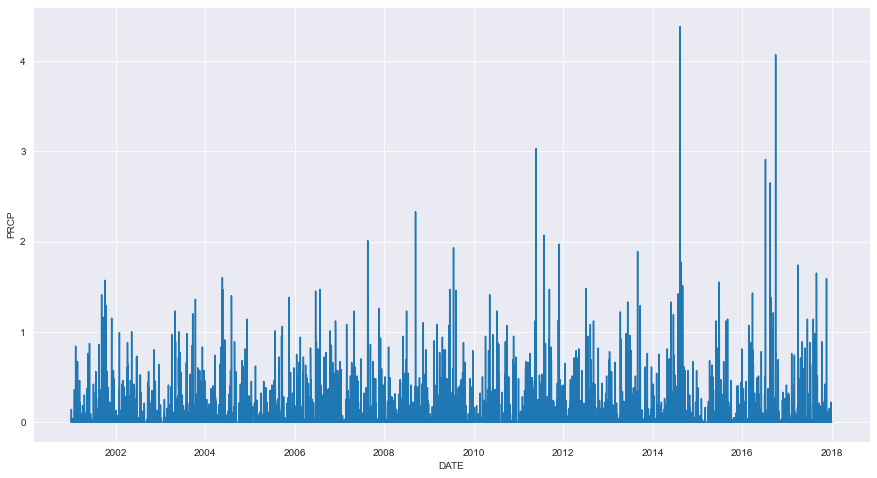

In [76]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
sns.lineplot(data = data["PRCP"])

## 10 - Observe que a série temporal diária parece ser bastante caótica e varia significativamente de um passo para outro.Crie séries temporais agregadas por mês para obter os valores totais mensais de precipitação. Plot a série temporal resultante, ela deve variar mais suavemente em comparação com a série temporal diária.

In [69]:
x = data.groupby(["year", "month"])['PRCP'].mean()
data_wide = x.unstack()
data_wide.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2001,0.027097,0.091071,0.026774,0.042333,0.101935,0.055000,0.064516,0.075161,0.140000,0.202258,0.112333,0.050645
2002,0.040000,0.088214,0.048710,0.128000,0.107097,0.083333,0.062903,0.018065,0.046333,0.046129,0.071667,0.042258
2003,0.009677,0.022500,0.052258,0.063000,0.187742,0.071333,0.025161,0.077097,0.126667,0.070645,0.101000,0.067742
2004,0.028387,0.020345,0.092903,0.014000,0.225161,0.081667,0.075806,0.145806,0.025000,0.067097,0.094000,0.078387
2005,0.068387,0.079286,0.018966,0.063103,0.039032,0.060000,0.115161,0.057419,0.098000,0.015161,0.098333,0.052581


In [70]:
data_month = data['PRCP'].resample("M").mean()
data_month

DATE
2001-01-31    0.027097
2001-02-28    0.091071
2001-03-31    0.026774
2001-04-30    0.042333
2001-05-31    0.101935
                ...   
2017-08-31    0.140667
2017-09-30    0.040333
2017-10-31    0.063226
2017-11-30    0.105172
2017-12-31    0.019355
Freq: M, Name: PRCP, Length: 204, dtype: float64

<AxesSubplot:xlabel='month', ylabel='PRCP'>

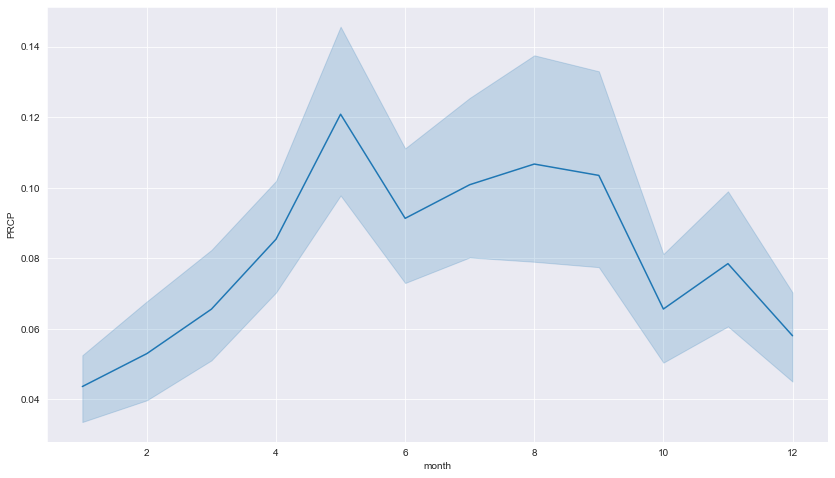

In [89]:
plt.figure(figsize=(14,8))
sns.lineplot(x = 'month', y='PRCP', data = data, )

<AxesSubplot:xlabel='month', ylabel='PRCP'>

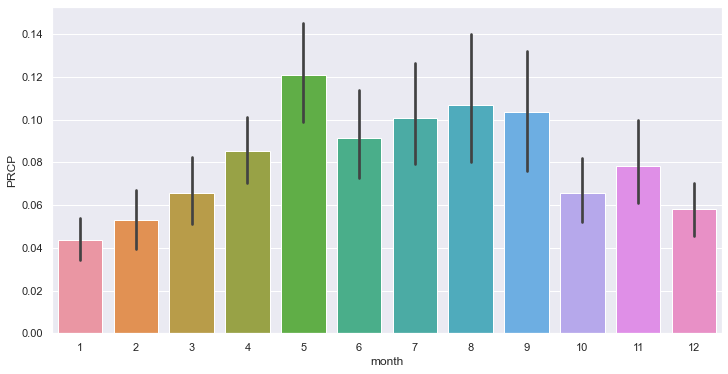

In [168]:
sns.barplot(x = 'month', y='PRCP', data = data)

## 11 -Agora agrupe e agregue por ano para obter os valores de precipitação anuais e plot o resultado.

<AxesSubplot:xlabel='year', ylabel='PRCP'>

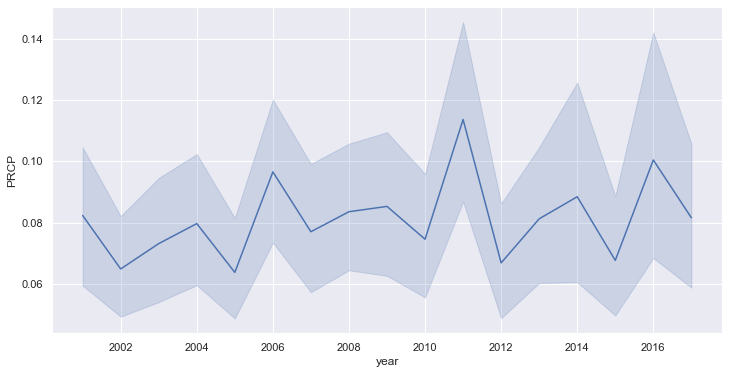

In [167]:
sns.lineplot(x = 'year', y='PRCP', data = data)

<AxesSubplot:xlabel='year', ylabel='PRCP'>

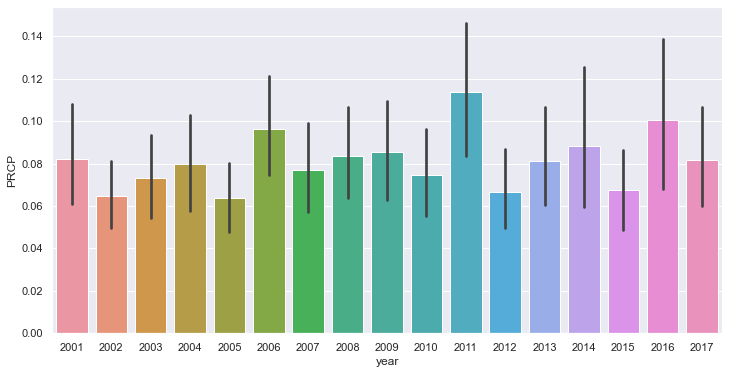

In [169]:
sns.barplot(x = 'year', y='PRCP', data = data)

# Parte 3

## 12 - Selecione uma amostra de tamanho 30 aleatoriamente (sem substituição) dos dados NFL Play by Play.

In [89]:
df_sample = df.sample(n=30)

In [92]:
df_sample

,Date,GameID,Drive,qtr,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,...,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType
57438,0,0.000000e+00,0.0,0.0,0,0.0,0.0,0.0,0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
44679,0,0.000000e+00,0.0,0.0,0,0.0,0.0,0.0,0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
90671,2011-09-11,2.011091e+09,14.0,3.0,12:40,13.0,1660.0,4.0,HOU,49.0,...,IND,HOU,(12:40) (Shotgun) K.Collins pass short right t...,1.0,10.0,0.0,0.0,0.0,0.0,Pass
265256,2014-12-20,2.014122e+09,18.0,4.0,07:39,8.0,459.0,11.0,WAS,8.0,...,PHI,WAS,"(7:39) (No Huddle, Shotgun) L.McCoy left end t...",1.0,0.0,0.0,0.0,0.0,0.0,Run
208963,2013-11-24,2.013112e+09,18.0,4.0,15:00,15.0,900.0,7.0,TB,14.0,...,TB,DET,(15:00) B.Rainey right tackle to TB 15 for 1 y...,1.0,1.0,0.0,0.0,0.0,0.0,Run
315882,2016-01-03,2.016010e+09,14.0,2.0,02:00,2.0,1920.0,0.0,DEN,49.0,...,SD,DEN,(2:00) (Shotgun) P.Rivers pass short left to J...,1.0,3.0,0.0,0.0,0.0,0.0,Pass
64490,2010-10-31,2.010103e+09,13.0,2.0,02:00,2.0,1920.0,0.0,TB,7.0,...,TB,ARI,(2:00) L.Blount right tackle to TB 14 for 7 ya...,1.0,7.0,0.0,0.0,0.0,0.0,Run
217785,0,0.000000e+00,0.0,0.0,0,0.0,0.0,0.0,0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
118624,0,0.000000e+00,0.0,0.0,0,0.0,0.0,0.0,0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
291880,2015-11-01,2.015110e+09,8.0,2.0,03:34,4.0,2014.0,4.0,DEN,3.0,...,GB,DEN,(3:34) (Shotgun) E.Lacy left tackle to DEN 2 f...,1.0,1.0,0.0,0.0,0.0,0.0,Run


## 13 - Selecione aleatoriamente 1% dos dados (sem substituição) e exiba as amostras selecionadas.

In [98]:
df_sample_1 = df.sample(frac=0.01)

In [99]:
df_sample_1

,Date,GameID,Drive,qtr,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,...,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType
146313,2012-10-07,2.012101e+09,11.0,2.0,01:16,2.0,1876.0,37.0,CLE,7.0,...,NYG,CLE,(1:16) (Shotgun) E.Manning pass short left to ...,1.0,7.0,1.0,1.0,0.0,0.0,Pass
32108,2009-12-06,2.009121e+09,6.0,1.0,02:08,3.0,2828.0,4.0,CIN,20.0,...,CIN,DET,(2:08) (Shotgun) C.Palmer pass short middle to...,1.0,14.0,0.0,0.0,0.0,0.0,Pass
65866,2010-11-07,2.010111e+09,7.0,2.0,03:51,4.0,2031.0,40.0,BUF,35.0,...,CHI,BUF,(3:51) (Shotgun) J.Cutler up the middle to BUF...,1.0,14.0,0.0,0.0,0.0,0.0,Run
37825,2009-12-20,2.009122e+09,23.0,4.0,02:31,3.0,151.0,7.0,DEN,43.0,...,OAK,DEN,(2:31) (Shotgun) J.Russell pass incomplete sho...,1.0,0.0,0.0,0.0,0.0,0.0,Pass
249148,2014-11-06,2.014111e+09,13.0,2.0,01:31,2.0,1891.0,4.0,CLE,44.0,...,CLE,CIN,(1:31) B.Hoyer scrambles right end ran ob at C...,1.0,3.0,0.0,0.0,0.0,0.0,Run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38016,2009-12-20,2.009122e+09,23.0,4.0,00:36,1.0,36.0,18.0,SD,31.0,...,SD,CIN,(:36) P.Rivers pass to V.Jackson to CIN 49 for...,1.0,20.0,0.0,0.0,0.0,0.0,Pass
327397,2016-10-02,2.016100e+09,9.0,2.0,03:59,4.0,2039.0,27.0,NO,11.0,...,NO,SD,(3:59) (Shotgun) M.Ingram up the middle to NO ...,1.0,1.0,0.0,0.0,0.0,0.0,Run
335567,2016-10-23,2.016102e+09,5.0,1.0,04:30,5.0,2970.0,45.0,ARI,37.0,...,ARI,SEA,(4:30) C.Palmer pass short middle to M.Floyd t...,1.0,13.0,0.0,0.0,0.0,0.0,Pass
100632,2011-10-09,2.011101e+09,1.0,1.0,09:47,10.0,3287.0,5.0,PIT,7.0,...,TEN,PIT,(9:47) M.Hasselbeck pass incomplete short righ...,1.0,0.0,0.0,0.0,0.0,0.0,Pass


## 14 - Realize uma amostragem com substituição para criar uma amostra cujo tamanho é igual a 1% de todos os dados. Você deve poder observar instâncias duplicadas na amostra ao aumentar o tamanho da amostra.

In [106]:
df_sample_subs = df.sample(frac=0.01,replace= True)

In [108]:
df_sample_subs

,Date,GameID,Drive,qtr,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,...,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType
232750,2014-09-21,2.014092e+09,3.0,1.0,01:43,2.0,2803.0,25.0,SF,31.0,...,ARI,SF,(1:43) S.Taylor up the middle to SF 29 for 2 y...,1.0,2.0,0.0,0.0,0.0,0.0,Run
69940,0,0.000000e+00,0.0,0.0,0,0.0,0.0,0.0,0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
320188,2016-09-18,2.016092e+09,14.0,2.0,04:10,5.0,2050.0,0.0,CIN,25.0,...,CIN,PIT,(4:10) (Shotgun) A.Dalton pass short right to ...,1.0,7.0,0.0,0.0,0.0,0.0,Pass
121525,2011-12-04,2.011120e+09,2.0,1.0,11:28,12.0,3388.0,10.0,CHI,18.0,...,CHI,KC,(11:28) M.Forte left guard to CHI 23 for 5 yar...,1.0,5.0,0.0,0.0,0.0,0.0,Run
138289,2012-09-16,2.012092e+09,1.0,1.0,11:10,12.0,3370.0,37.0,BAL,19.0,...,PHI,BAL,"(11:10) (No Huddle, Shotgun) D.Johnson left en...",1.0,6.0,0.0,0.0,0.0,0.0,Run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147231,0,0.000000e+00,0.0,0.0,0,0.0,0.0,0.0,0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
342267,2016-11-13,2.016111e+09,18.0,3.0,02:42,3.0,1062.0,17.0,TEN,20.0,...,GB,TEN,"(2:42) (No Huddle, Shotgun) A.Rodgers pass inc...",1.0,0.0,0.0,0.0,0.0,0.0,No Play
194510,2013-10-13,2.013101e+09,13.0,3.0,04:29,5.0,1169.0,40.0,STL,30.0,...,HOU,STL,(4:29) A.Foster left tackle to STL 23 for 7 ya...,1.0,7.0,0.0,0.0,0.0,0.0,Run
322521,2016-09-22,2.016092e+09,7.0,1.0,01:17,2.0,2777.0,37.0,HOU,26.0,...,HOU,NE,(1:17) (Shotgun) B.Osweiler pass incomplete sh...,1.0,0.0,0.0,0.0,0.0,0.0,Pass


## 15 - Plot um histograma que mostra a distribuição dos valores do atributo "TimeSecs". A função value_counts() também pode ser aplicada para contar a frequência de cada valor de atributo.

In [118]:
df['TimeSecs'].value_counts()

 0.0       27416
 900.0      3200
 2700.0     3016
 120.0      2612
 1920.0     2453
           ...  
-801.0         1
-727.0         1
-675.0         1
-255.0         1
-268.0         1
Name: TimeSecs, Length: 4327, dtype: int64

<AxesSubplot:>

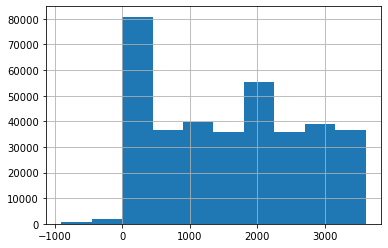

In [119]:
df['TimeSecs'].hist()

## 16 - Para o método de largura igual, aplique a função cut() para discretizar o atributo em 4 bins de larguras de intervalo semelhantes. A função value_counts() pode ser usada para determinar o número de instâncias em cada bin.

In [117]:
pd.cut(df['TimeSecs'], bins=4).value_counts()

(1350.0, 2475.0]    109559
(225.0, 1350.0]      97157
(2475.0, 3600.0]     92793
(-904.5, 225.0]      62375
Name: TimeSecs, dtype: int64

In [120]:
pd.cut(df['TimeSecs'], bins=4)

0          (-904.5, 225.0]
1         (2475.0, 3600.0]
2         (2475.0, 3600.0]
3         (2475.0, 3600.0]
4         (2475.0, 3600.0]
                ...       
362442     (-904.5, 225.0]
362443     (-904.5, 225.0]
362444     (-904.5, 225.0]
362445     (-904.5, 225.0]
362446     (-904.5, 225.0]
Name: TimeSecs, Length: 361884, dtype: category
Categories (4, interval[float64]): [(-904.5, 225.0] < (225.0, 1350.0] < (1350.0, 2475.0] < (2475.0, 3600.0]]

## 17 -Para o método de frequência igual, aplique a função qcut() ppara particionar os valores em 4 compartimentos, de forma que cada bin tenha quase o mesmo número de instâncias.

In [122]:
pd.qcut(df['TimeSecs'],q=4)

0         (-900.001, 537.0]
1          (2505.0, 3600.0]
2          (2505.0, 3600.0]
3          (2505.0, 3600.0]
4          (2505.0, 3600.0]
                ...        
362442    (-900.001, 537.0]
362443    (-900.001, 537.0]
362444    (-900.001, 537.0]
362445    (-900.001, 537.0]
362446    (-900.001, 537.0]
Name: TimeSecs, Length: 361884, dtype: category
Categories (4, interval[float64]): [(-900.001, 537.0] < (537.0, 1613.0] < (1613.0, 2505.0] < (2505.0, 3600.0]]

In [123]:
pd.qcut(df['TimeSecs'],q=4 ).value_counts()

(537.0, 1613.0]      90521
(-900.001, 537.0]    90486
(1613.0, 2505.0]     90473
(2505.0, 3600.0]     90404
Name: TimeSecs, dtype: int64